In [1]:
import json
import networkx as nx
import numpy as np

In [2]:
with open('MC1.json', 'r') as file:
    json_data = json.load(file)
nodes = json_data['nodes']
links = json_data['links']

In [3]:
G = nx.DiGraph()
edges = []
for link in links:
    edges.append((link['source'], link['target']))
G.add_edges_from(edges)

In [4]:
suspected_entities  = ["Mar de la Vida OJSC", "979893388", "Oceanfront Oasis Inc Carriers", "8327"]

def selected_idx(selected_cc):     # 寻找可疑节点所在的强/弱连通分量
    idx = -np.ones(4)
    for i in range(len(selected_cc)):
        if "Mar de la Vida OJSC" in selected_cc[i]:
            idx[0] = i
        if "979893388" in selected_cc[i]:
            idx[1] = i
        if "Oceanfront Oasis Inc Carriers" in selected_cc[i]:
            idx[2] = i
        if "8327" in selected_cc[i]:
            idx[3] = i
    return idx

In [5]:
import matplotlib.pyplot as plt
def generate_plot(selected_cc, x, title):
    # 柱状图的数据
    cc_idx = range(len(selected_cc))
    values = [len(temp) for temp in selected_cc]

    # 创建柱状图
    plt.bar(cc_idx, values)

    # 标出可疑实体所在的CC
    for i in idx:
        i = int(i)
        if i != -1:
            plt.bar(cc_idx[i], values[i], color='red')

    # 添加标题和轴标签
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel("count")

    # 标注数据
    for i in range(len(cc_idx)):
        plt.text(i, values[i], str(values[i]), ha='center', va='bottom')

    # 显示图形
    plt.show()

## Strongly connected components

不同分量之间的节点则不具备相互可达性

In [6]:
scc = list(nx.strongly_connected_components(G))

selected_scc = list()
cnt = 0
for component in scc:
    if len(component)>1:
        cnt += len(component)
        selected_scc.append(component)
        print(component)

{'Jasmine Camacho', 'Lindsey Palmer', 'â\x80\x9cespecially'}
{'457009514', '99575926'}
{'79139', '78135'}
{'James Stewart', '1968776'}
{'Cynthia Williams', '76', 'Armed Robberyâ', '58'}
{'4946', '977'}
{'59662085', '374585759'}
{'94361818', '805275'}
{'Pontus Navigation Corp', 'Triton Navigation Corp'}
{'7490484', 'Kari Padilla'}
{'Faroe Islands Shrimp Shark', '76568', 'Jeremy Norris', 'Tammy Martin', 'Alpha Brokersa', 'Jeffrey Mills', 'Feb', 'April', '860600018', '63', 'Erin Simmons', '672', '292bf7d9-d86c-411d-9a85-da0cb4535e22', 'HMS Montrose', '2983', '2591586', 'Angela Chang', 'ninety', 'Joseph Gonzales', '11353', '199442', 'd0123474-8425-4ab0-90d5-175920158638', 'Fisheries Animal Industriesâ', 'Michele Henry', 'Douglas Gordon', 'Jason Brown', 'Thai Union Seafood', '77b46bc7-7e31-41a0-973c-e633011d21b0', 'Alyssa Gonzalez', 'Jacob Caldwell', 'David Mcfarland', '426469', 'Seaside Sojourns A/S Shipping', 'â\x80\x9cVikingâ', '262157542', '41', 'Electronic', 'Mario Richardson', '4382',

In [7]:
print(f"There are {len(selected_scc)} strongly connected components (size>1).")

There are 22 strongly connected components (size>1).


In [8]:
print(f"There are {cnt} nodes that are in selected scc.")  # 总共3428个node

There are 930 nodes that are in selected scc.


In [9]:
idx = selected_idx(selected_scc)
print(idx)    # "Oceanfront Oasis Inc Carriers"不在最大的SCC里，单独成SCC

[10. 10. -1. 10.]


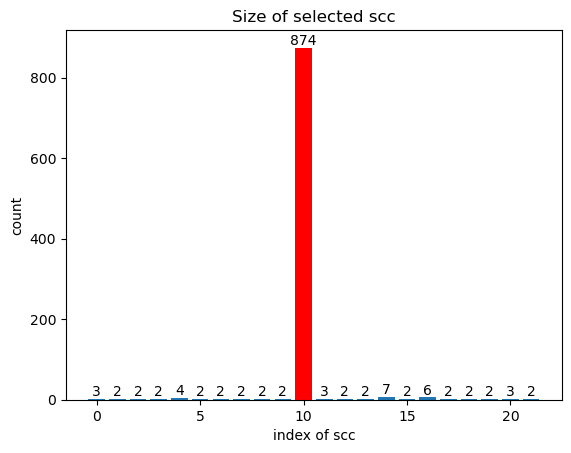

In [10]:
generate_plot(selected_scc, x = "index of scc", title = "Size of selected scc")

## Weakly connected components

In [11]:
wcc = list(nx.weakly_connected_components(G))

selected_wcc = list()
isolated_node = list()
cnt = 0
for component in wcc:
    if len(component)>1:
        cnt += len(component)
        selected_wcc.append(component)
        print(component)
    else:
        isolated_node.append(component)

{'812137', '2ade0908-d1c9-45de-9dbb-3dfec75d9317', '33560', '56126935', 'Timothy Hampton', 'Denise Vance', '5337', 'Chad Nichols', '9ce492a2-de6e-4231-a018-318fc929908b', 'Stacy Castillo', '63', 'Blake Smith', '672', 'Rhonda Johnson', '80774', 'Leominster Provincetownâ', 'Dawn Robinson', '2983', '1334578', 'Andrea White', 'Wendy Miller', '649009867', '26676370', 'Brandon Berger', 'Fisheries Animal Industriesâ', '76609426', 'e2816018-e01c-4eac-8dc5-e84aebc22cff', '245658', '1f8c20da-5f20-4116-907a-a653089bb8a0', 'Alyssa Gonzalez', 'Jacob Caldwell', 'David Mcfarland', 'Ocean Packers', 'c0ce6d15-622b-42a3-b892-f5efe5b4d00c', 'Lindsey Conway', 'Seaside Sojourns A/S Shipping', '262157542', '28890617', '72092', 'â\x80\x9cillegalâ', '176', 'ab195b55-453e-4436-ab0c-9f5660b4ec8c', 'Jason Hughes', 'Joshua Park', '67a59fab-710a-4992-b6d0-d581fd9dceba', '90be60b1-61d8-4115-b133-e4c8e09383eb', 'Michelle Aguilar', 'Patricia Byrd', '567217', '218', 'Justin Fowler', 'b5856109-c5a0-43a6-8c70-ebfe73cc24

In [12]:
print(f"There are {len(selected_wcc)} weakly connected components (size>1).")

There are 83 weakly connected components (size>1).


In [13]:
print(f"There are {cnt} nodes that in selected wcc.")  # 总共3428个node 有1个孤立点?

There are 3428 nodes that in selected wcc.


In [14]:
print(isolated_node)     #该孤立点没有被记录 应该是因为前面创建有向图只记录了边，而该孤立点没有边与其相连

[]


In [15]:
idx = selected_idx(selected_wcc)
print(idx)

[0. 0. 0. 0.]


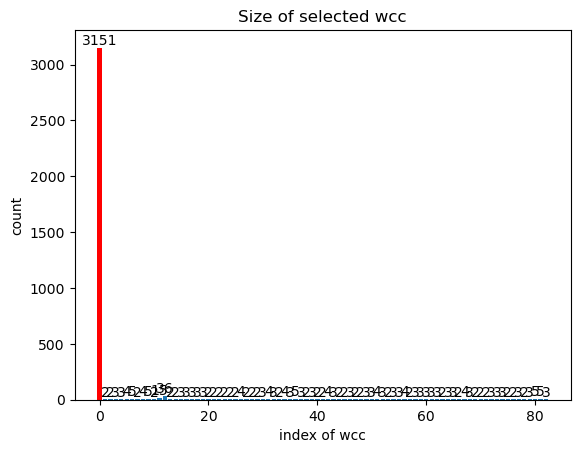

In [16]:
generate_plot(selected_wcc, x = "index of wcc", title = "Size of selected wcc")